In [1]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import pandas as pd
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import statsmodels.api as sm
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix


import statsmodels.api as sm
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tools.eval_measures import rmse
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVR
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('final_with_covid_AS.csv')


# Car Driver

In [3]:
filtered_data = data[data['CarDriver'] == 1]
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12582 entries, 11 to 54025
Data columns (total 58 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CountCases       12582 non-null  int64  
 1   BedDys           12582 non-null  int64  
 2   BeddystoCC       12582 non-null  float64
 3   Severity         12582 non-null  int64  
 4   DiedCases        12582 non-null  int64  
 5   DiedBdDys        12582 non-null  int64  
 6   Hsptlsns         12582 non-null  int64  
 7   April            12582 non-null  int64  
 8   August           12582 non-null  int64  
 9   December         12582 non-null  int64  
 10  February         12582 non-null  int64  
 11  January          12582 non-null  int64  
 12  July             12582 non-null  int64  
 13  June             12582 non-null  int64  
 14  March            12582 non-null  int64  
 15  May              12582 non-null  int64  
 16  November         12582 non-null  int64  
 17  October    

In [4]:
target = filtered_data['Hsptlsns'].shift(-1)

In [5]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import xgboost as xgb


import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd



X = filtered_data[['Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Male',
                   'Regional',

                   'April','December','February','January','July',
                   'June','March','May','November','October','September',

                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV','CntrprtCrTrkVn',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',

                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   'Y2013','Y2012',
                   'CovidPrd']].iloc[:-1,:]


y = target.iloc[:-1]


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=45)
# تعریف مدل XGBoost با توزیع پواسون
params = {
    'objective': 'count:poisson',
    'eval_metric': 'poisson-nloglik',
    'n_estimators': 500,
    'max_depth': 10,
    'eta': 0.05
}

# آموزش مدل XGBoost
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)
xgb_model = xgb.train(params, dtrain, num_boost_round=1000)

# پیش‌بینی بر روی داده‌های آزمون
y_pred = xgb_model.predict(dtest)

/Users/amin/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [21:30:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# محاسبه خطای میانگین مربعات (MSE) و خطای میانگین مطلق (MAE)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
from sklearn.metrics import r2_score

# محاسبه R²
r2 = r2_score(y_test, y_pred)

print("R² Score:", r2)

Mean Squared Error (MSE): 26.749567929185602
Mean Absolute Error (MAE): 2.630741583337847
R² Score: 0.8857374811109036


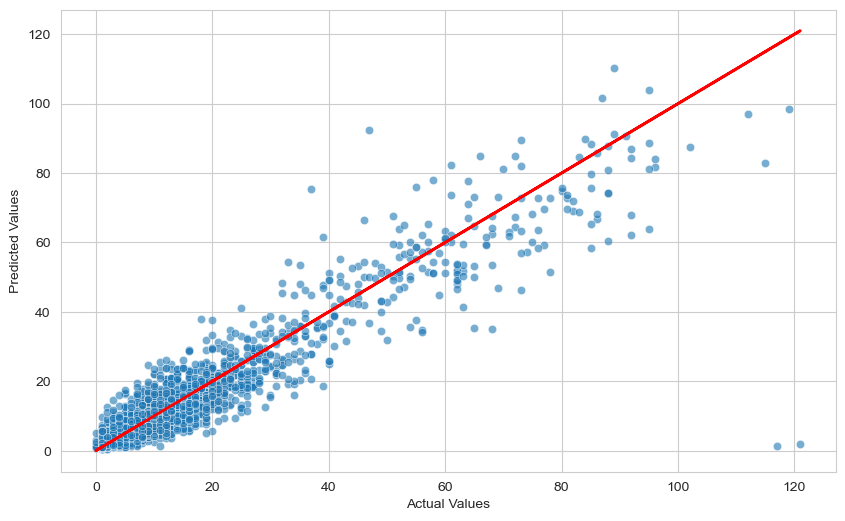

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# تنظیمات اصلی نمودار
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# رسم نمودار پراکنش پیش‌بینی‌ها در مقابل مقادیر واقعی
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

# رسم خط برابری (y=x) برای مقایسه بهتر
plt.plot(y_test, y_test, color='red', linewidth=2)

# نمایش نمودار
plt.show()

In [8]:
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)

X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)


params = {
    'objective': 'count:poisson',
    'eval_metric': 'poisson-nloglik',
    'n_estimators': 500,
    'max_depth': 10,
    'eta': 0.05
}

# آموزش مدل XGBoost
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)
xgb_model = xgb.train(params, dtrain, num_boost_round=1000)


predicted_counts = xgb_model.predict(dtest)

rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)

rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)

cv = rmse / y.mean()

print(f"Coefficient of Variation (CV): {cv:.3f}")

/Users/amin/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [18:28:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


RMSE: 3.6280284034645485
MAE: 2.2670269488946055
R^2: 0.8539898280223046
Coefficient of Variation (CV): 0.353


In [8]:
import numpy as np
import xgboost as xgb
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error



global Nmse_values, mae_values, r2_values
Nmse_values = []
ioa_values = []
r2_values = []
aic_values=[]
bic_values=[]





# Assuming 'X' and 'y' are predefined datasets
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)
X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3, random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

params = {
    'objective': 'count:poisson',  # Objective function for Poisson regression
    'eval_metric': 'poisson-nloglik',
    'n_estimators': 500,
    'max_depth': 10,
    'eta': 0.05
}

# Training the XGBoost model
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)
xgb_model = xgb.train(params, dtrain, num_boost_round=1000)

# Predicting counts
predicted_counts = xgb_model.predict(dtest)

# Metrics calculation
rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)
rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

# Output RMSE, MAE, and R^2
print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)

def nmse(y_true, y_pred):
    N = y_true.shape[0]
    y_true_bar = np.mean(y_true)
    y_pred_bar = np.mean(y_pred)
    numerator = 1 / N * np.sum((y_true - y_pred) ** 2)
    denominator = y_true_bar * y_pred_bar
    return numerator / denominator

nmse_score = nmse(y_test, predicted_counts)
print("NMSE score:", nmse_score)

def index_of_agreement(y_true, y_pred):
    numerator = np.sum(np.square(y_pred - y_true))
    denominator = np.sum(np.square(np.abs(y_pred - np.mean(y_true)) + np.abs(y_true - np.mean(y_true))))
    return 1 - (numerator / denominator)

ioa = index_of_agreement(y_test, predicted_counts)
print(f"Index of Agreement: {ioa:.2f}")

Nmse_values.append(nmse_score)
ioa_values.append(ioa)
r2_values.append(r_squared)






# AIC and BIC calculation
n = len(y_test)  # Number of observations
p = x_train.shape[1]  # Number of parameters; x_train includes the constant term

aic = n * np.log(rss / n) + 2 * (p + 1)  

bic = n * np.log(rss / n) + np.log(n) * (p + 1)

print("AIC:", aic)
print("BIC:", bic)
aic_values.append(aic)
bic_values.append(bic)


/Users/amin/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [21:31:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


RMSE: 3.6280284034645485
MAE: 2.2670269488946055
R^2: 0.8539898280223046
NMSE score: 0.20355760324923888
Index of Agreement: 0.96
AIC: 9507.473987682231
BIC: 9761.854322826355


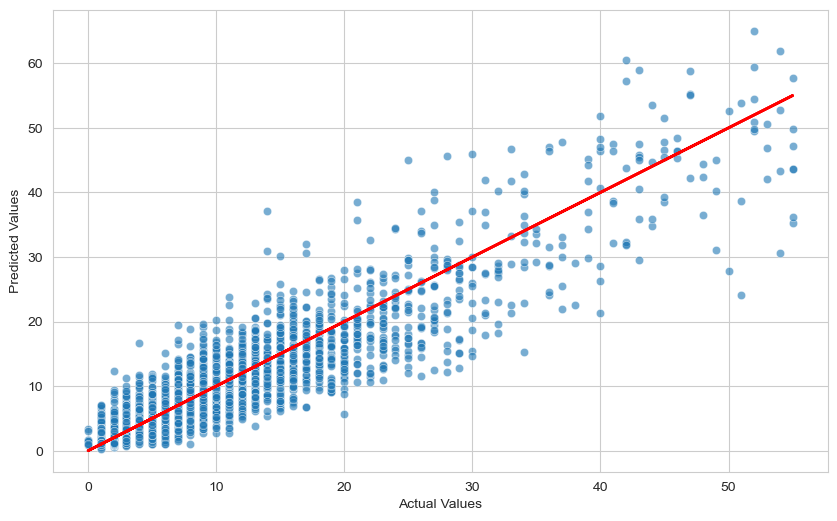

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# تنظیمات اصلی نمودار
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# رسم نمودار پراکنش پیش‌بینی‌ها در مقابل مقادیر واقعی
sns.scatterplot(x=y_test, y=predicted_counts, alpha=0.6)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

# رسم خط برابری (y=x) برای مقایسه بهتر
plt.plot(y_test, y_test, color='red', linewidth=2)

# نمایش نمودار
plt.show()

# car passanger



In [9]:
filtered_data2 = data[data['CarPngr'] == 1]


In [10]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import xgboost as xgb


import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd


X = filtered_data2[['Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Male',
                   'Regional',

                   'April','December','February','January','July',
                   'June','March','May','November','October','September',

                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV','CntrprtCrTrkVn',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',

                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   'Y2013','Y2012',
                   'CovidPrd']]


y = filtered_data2['Hsptlsns']


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=45)
# تعریف مدل XGBoost با توزیع پواسون
params = {
    'objective': 'count:poisson',
    'eval_metric': 'poisson-nloglik',
    'n_estimators': 500,
    'max_depth': 10,
    'eta': 0.05
}

# آموزش مدل XGBoost
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)
xgb_model = xgb.train(params, dtrain, num_boost_round=1000)

# پیش‌بینی بر روی داده‌های آزمون
y_pred = xgb_model.predict(dtest)

/Users/amin/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [21:33:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# محاسبه خطای میانگین مربعات (MSE) و خطای میانگین مطلق (MAE)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
from sklearn.metrics import r2_score

# محاسبه R²
r2 = r2_score(y_test, y_pred)

print("R² Score:", r2)

Mean Squared Error (MSE): 6.6041181082480325
Mean Absolute Error (MAE): 1.6936427849327267
R² Score: 0.6889778755793182


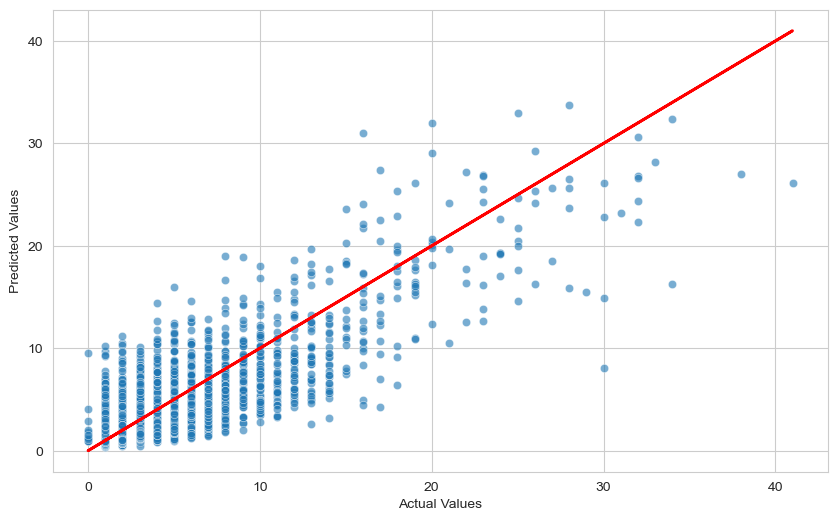

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# تنظیمات اصلی نمودار
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# رسم نمودار پراکنش پیش‌بینی‌ها در مقابل مقادیر واقعی
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

# رسم خط برابری (y=x) برای مقایسه بهتر
plt.plot(y_test, y_test, color='red', linewidth=2)

# نمایش نمودار
plt.show()

In [13]:
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)

X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)


params = {
    'objective': 'count:poisson',
    'eval_metric': 'poisson-nloglik',
    'n_estimators': 500,
    'max_depth': 10,
    'eta': 0.05
}

# آموزش مدل XGBoost
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)
xgb_model = xgb.train(params, dtrain, num_boost_round=1000)


predicted_counts = xgb_model.predict(dtest)

rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)

rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)

cv = rmse / y.mean()

print(f"Coefficient of Variation (CV): {cv:.3f}")

/Users/amin/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [21:33:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


RMSE: 2.361034657130873
MAE: 1.5742834488907667
R^2: 0.5276319111408605
Coefficient of Variation (CV): 0.575


In [14]:
import numpy as np
import xgboost as xgb
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error



global Nmse_values, mae_values, r2_values
#Nmse_values = []
#ioa_values = []
#r2_values = []
#aic_values=[]
#bic_values=[]





# Assuming 'X' and 'y' are predefined datasets
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)
X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3, random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

params = {
    'objective': 'count:poisson',  # Objective function for Poisson regression
    'eval_metric': 'poisson-nloglik',
    'n_estimators': 500,
    'max_depth': 10,
    'eta': 0.05
}

# Training the XGBoost model
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)
xgb_model = xgb.train(params, dtrain, num_boost_round=1000)

# Predicting counts
predicted_counts = xgb_model.predict(dtest)

# Metrics calculation
rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)
rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

# Output RMSE, MAE, and R^2
print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)

def nmse(y_true, y_pred):
    N = y_true.shape[0]
    y_true_bar = np.mean(y_true)
    y_pred_bar = np.mean(y_pred)
    numerator = 1 / N * np.sum((y_true - y_pred) ** 2)
    denominator = y_true_bar * y_pred_bar
    return numerator / denominator

nmse_score = nmse(y_test, predicted_counts)
print("NMSE score:", nmse_score)

def index_of_agreement(y_true, y_pred):
    numerator = np.sum(np.square(y_pred - y_true))
    denominator = np.sum(np.square(np.abs(y_pred - np.mean(y_true)) + np.abs(y_true - np.mean(y_true))))
    return 1 - (numerator / denominator)

ioa = index_of_agreement(y_test, predicted_counts)
print(f"Index of Agreement: {ioa:.2f}")

Nmse_values.append(nmse_score)
ioa_values.append(ioa)
r2_values.append(r_squared)






# AIC and BIC calculation
n = len(y_test)  # Number of observations
p = x_train.shape[1]  # Number of parameters; x_train includes the constant term

aic = n * np.log(rss / n) + 2 * (p + 1)  

bic = n * np.log(rss / n) + np.log(n) * (p + 1)

print("AIC:", aic)
print("BIC:", bic)
aic_values.append(aic)
bic_values.append(bic)


/Users/amin/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [21:33:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


RMSE: 2.361034657130873
MAE: 1.5742834488907667
R^2: 0.5276319111408605
NMSE score: 0.4266696702957406
Index of Agreement: 0.86
AIC: 6013.225965052619
BIC: 6265.241036192955


# Mtrcyclist REGRESION

In [15]:

filtered_data3 = data[data['Mtrcyclist'] == 1]
filtered_data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11227 entries, 3 to 54034
Data columns (total 58 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CountCases       11227 non-null  int64  
 1   BedDys           11227 non-null  int64  
 2   BeddystoCC       11227 non-null  float64
 3   Severity         11227 non-null  int64  
 4   DiedCases        11227 non-null  int64  
 5   DiedBdDys        11227 non-null  int64  
 6   Hsptlsns         11227 non-null  int64  
 7   April            11227 non-null  int64  
 8   August           11227 non-null  int64  
 9   December         11227 non-null  int64  
 10  February         11227 non-null  int64  
 11  January          11227 non-null  int64  
 12  July             11227 non-null  int64  
 13  June             11227 non-null  int64  
 14  March            11227 non-null  int64  
 15  May              11227 non-null  int64  
 16  November         11227 non-null  int64  
 17  October     

In [16]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import xgboost as xgb


import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd


X = filtered_data3[['Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Male',
                   'Regional',

                   'April','December','February','January','July',
                   'June','March','May','November','October','September',

                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV','CntrprtCrTrkVn',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',

                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   'Y2013','Y2012',
                   'CovidPrd']]


y = filtered_data3['Hsptlsns']


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=45)
# تعریف مدل XGBoost با توزیع پواسون
params = {
    'objective': 'count:poisson',
    'eval_metric': 'poisson-nloglik',
    'n_estimators': 500,
    'max_depth': 10,
    'eta': 0.05
}

# آموزش مدل XGBoost
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)
xgb_model = xgb.train(params, dtrain, num_boost_round=1000)

# پیش‌بینی بر روی داده‌های آزمون
y_pred = xgb_model.predict(dtest)

/Users/amin/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [21:33:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# محاسبه خطای میانگین مربعات (MSE) و خطای میانگین مطلق (MAE)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
from sklearn.metrics import r2_score

# محاسبه R²
r2 = r2_score(y_test, y_pred)

print("R² Score:", r2)

Mean Squared Error (MSE): 14.2943249265993
Mean Absolute Error (MAE): 2.2425851472126834
R² Score: 0.8984405305992567


In [18]:
import numpy as np
import xgboost as xgb
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error



global Nmse_values, mae_values, r2_values
#Nmse_values = []
#ioa_values = []
#r2_values = []
#aic_values=[]
#bic_values=[]





# Assuming 'X' and 'y' are predefined datasets
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)
X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3, random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

params = {
    'objective': 'count:poisson',  # Objective function for Poisson regression
    'eval_metric': 'poisson-nloglik',
    'n_estimators': 500,
    'max_depth': 10,
    'eta': 0.05
}

# Training the XGBoost model
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)
xgb_model = xgb.train(params, dtrain, num_boost_round=1000)

# Predicting counts
predicted_counts = xgb_model.predict(dtest)

# Metrics calculation
rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)
rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

# Output RMSE, MAE, and R^2
print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)

def nmse(y_true, y_pred):
    N = y_true.shape[0]
    y_true_bar = np.mean(y_true)
    y_pred_bar = np.mean(y_pred)
    numerator = 1 / N * np.sum((y_true - y_pred) ** 2)
    denominator = y_true_bar * y_pred_bar
    return numerator / denominator

nmse_score = nmse(y_test, predicted_counts)
print("NMSE score:", nmse_score)

def index_of_agreement(y_true, y_pred):
    numerator = np.sum(np.square(y_pred - y_true))
    denominator = np.sum(np.square(np.abs(y_pred - np.mean(y_true)) + np.abs(y_true - np.mean(y_true))))
    return 1 - (numerator / denominator)

ioa = index_of_agreement(y_test, predicted_counts)
print(f"Index of Agreement: {ioa:.2f}")

Nmse_values.append(nmse_score)
ioa_values.append(ioa)
r2_values.append(r_squared)






# AIC and BIC calculation
n = len(y_test)  # Number of observations
p = x_train.shape[1]  # Number of parameters; x_train includes the constant term

aic = n * np.log(rss / n) + 2 * (p + 1)  

bic = n * np.log(rss / n) + np.log(n) * (p + 1)

print("AIC:", aic)
print("BIC:", bic)
aic_values.append(aic)
bic_values.append(bic)


/Users/amin/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [21:34:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


RMSE: 3.3775668707685167
MAE: 2.0606968087561293
R^2: 0.8527192270599127
NMSE score: 0.2772159613205039
Index of Agreement: 0.96
AIC: 8017.854443875226
BIC: 8267.523225324017


# Pedal cyclist Regrasion


In [19]:
filtered_data4 = data[data['PdlCyclist'] == 1]


In [20]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import xgboost as xgb


import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd


X = filtered_data4[['Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Male',
                   'Regional',

                   'April','December','February','January','July',
                   'June','March','May','November','October','September',

                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV','CntrprtCrTrkVn',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',

                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   'Y2013','Y2012',
                   'CovidPrd']]


y = filtered_data4['Hsptlsns']


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=45)
# تعریف مدل XGBoost با توزیع پواسون
params = {
    'objective': 'count:poisson',
    'eval_metric': 'poisson-nloglik',
    'n_estimators': 500,
    'max_depth': 10,
    'eta': 0.05
}

# آموزش مدل XGBoost
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)
xgb_model = xgb.train(params, dtrain, num_boost_round=1000)

# پیش‌بینی بر روی داده‌های آزمون
y_pred = xgb_model.predict(dtest)

/Users/amin/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [21:34:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# محاسبه خطای میانگین مربعات (MSE) و خطای میانگین مطلق (MAE)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
from sklearn.metrics import r2_score

# محاسبه R²
r2 = r2_score(y_test, y_pred)

print("R² Score:", r2)

Mean Squared Error (MSE): 19.13350985337206
Mean Absolute Error (MAE): 2.4253151688110743
R² Score: 0.7859984807589563


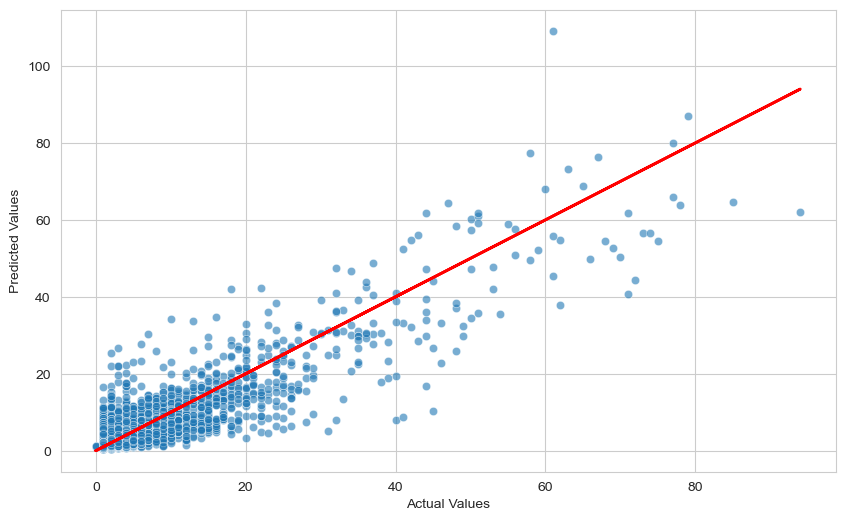

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# تنظیمات اصلی نمودار
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# رسم نمودار پراکنش پیش‌بینی‌ها در مقابل مقادیر واقعی
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

# رسم خط برابری (y=x) برای مقایسه بهتر
plt.plot(y_test, y_test, color='red', linewidth=2)

# نمایش نمودار
plt.show()

In [23]:
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)

X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)


params = {
    'objective': 'count:poisson',
    'eval_metric': 'poisson-nloglik',
    'n_estimators': 500,
    'max_depth': 10,
    'eta': 0.05
}

# آموزش مدل XGBoost
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)
xgb_model = xgb.train(params, dtrain, num_boost_round=1000)


predicted_counts = xgb_model.predict(dtest)

rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)

rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)

cv = rmse / y.mean()

print(f"Coefficient of Variation (CV): {cv:.3f}")

/Users/amin/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [21:34:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


RMSE: 3.603935899536907
MAE: 2.13070527164643
R^2: 0.5957858416577801
Coefficient of Variation (CV): 0.612


In [24]:
import numpy as np
import xgboost as xgb
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error



global Nmse_values, mae_values, r2_values
#Nmse_values = []
#ioa_values = []
#r2_values = []
#aic_values=[]
#bic_values=[]





# Assuming 'X' and 'y' are predefined datasets
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)
X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3, random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

params = {
    'objective': 'count:poisson',  # Objective function for Poisson regression
    'eval_metric': 'poisson-nloglik',
    'n_estimators': 500,
    'max_depth': 10,
    'eta': 0.05
}

# Training the XGBoost model
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)
xgb_model = xgb.train(params, dtrain, num_boost_round=1000)

# Predicting counts
predicted_counts = xgb_model.predict(dtest)

# Metrics calculation
rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)
rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

# Output RMSE, MAE, and R^2
print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)

def nmse(y_true, y_pred):
    N = y_true.shape[0]
    y_true_bar = np.mean(y_true)
    y_pred_bar = np.mean(y_pred)
    numerator = 1 / N * np.sum((y_true - y_pred) ** 2)
    denominator = y_true_bar * y_pred_bar
    return numerator / denominator

nmse_score = nmse(y_test, predicted_counts)
print("NMSE score:", nmse_score)

def index_of_agreement(y_true, y_pred):
    numerator = np.sum(np.square(y_pred - y_true))
    denominator = np.sum(np.square(np.abs(y_pred - np.mean(y_true)) + np.abs(y_true - np.mean(y_true))))
    return 1 - (numerator / denominator)

ioa = index_of_agreement(y_test, predicted_counts)
print(f"Index of Agreement: {ioa:.2f}")

Nmse_values.append(nmse_score)
ioa_values.append(ioa)
r2_values.append(r_squared)






# AIC and BIC calculation
n = len(y_test)  # Number of observations
p = x_train.shape[1]  # Number of parameters; x_train includes the constant term

aic = n * np.log(rss / n) + 2 * (p + 1)  

bic = n * np.log(rss / n) + np.log(n) * (p + 1)

print("AIC:", aic)
print("BIC:", bic)
aic_values.append(aic)
bic_values.append(bic)


/Users/amin/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [21:34:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


RMSE: 3.603935899536907
MAE: 2.13070527164643
R^2: 0.5957858416577801
NMSE score: 0.5924246887295251
Index of Agreement: 0.88
AIC: 9343.359823682196
BIC: 9597.232517178209


# Pedestrian

In [25]:
filtered_data5 = data[data['Pedestrian'] == 1]


In [26]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd


X = filtered_data5[['Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Male',
                   'Regional',

                   'April','December','February','January','July',
                   'June','March','May','November','October','September',

                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV','CntrprtCrTrkVn',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',

                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   'Y2013','Y2012',
                   'CovidPrd']]


y = filtered_data5['Hsptlsns']


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=45)
# تعریف مدل XGBoost با توزیع پواسون
params = {
    'objective': 'count:poisson',
    'eval_metric': 'poisson-nloglik',
    'n_estimators': 500,
    'max_depth': 10,
    'eta': 0.05
}

# آموزش مدل XGBoost
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)
xgb_model = xgb.train(params, dtrain, num_boost_round=1000)

# پیش‌بینی بر روی داده‌های آزمون
y_pred = xgb_model.predict(dtest)

/Users/amin/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [21:35:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# محاسبه خطای میانگین مربعات (MSE) و خطای میانگین مطلق (MAE)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
from sklearn.metrics import r2_score

# محاسبه R²
r2 = r2_score(y_test, y_pred)

print("R² Score:", r2)

Mean Squared Error (MSE): 9.092733670176973
Mean Absolute Error (MAE): 1.7399475375784057
R² Score: 0.6506053511474412


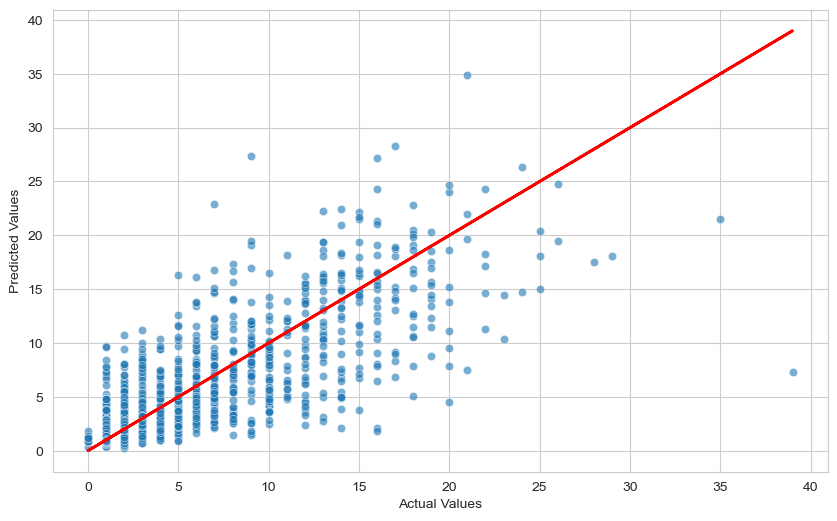

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# تنظیمات اصلی نمودار
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# رسم نمودار پراکنش پیش‌بینی‌ها در مقابل مقادیر واقعی
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

# رسم خط برابری (y=x) برای مقایسه بهتر
plt.plot(y_test, y_test, color='red', linewidth=2)

# نمایش نمودار
plt.show()

In [29]:
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)

X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)


params = {
    'objective': 'count:poisson',
    'eval_metric': 'poisson-nloglik',
    'n_estimators': 500,
    'max_depth': 10,
    'eta': 0.05
}

# آموزش مدل XGBoost
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)
xgb_model = xgb.train(params, dtrain, num_boost_round=1000)


predicted_counts = xgb_model.predict(dtest)

rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)

rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)

cv = rmse / y.mean()

print(f"Coefficient of Variation (CV): {cv:.3f}")

/Users/amin/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [21:35:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


RMSE: 2.762901935996588
MAE: 1.6506837839385429
R^2: 0.6451582082236339
Coefficient of Variation (CV): 0.629


In [30]:
import numpy as np
import xgboost as xgb
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error



global Nmse_values, mae_values, r2_values
#Nmse_values = []
#ioa_values = []
#r2_values = []
#aic_values=[]
#bic_values=[]





# Assuming 'X' and 'y' are predefined datasets
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)
X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3, random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

params = {
    'objective': 'count:poisson',  # Objective function for Poisson regression
    'eval_metric': 'poisson-nloglik',
    'n_estimators': 500,
    'max_depth': 10,
    'eta': 0.05
}

# Training the XGBoost model
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)
xgb_model = xgb.train(params, dtrain, num_boost_round=1000)

# Predicting counts
predicted_counts = xgb_model.predict(dtest)

# Metrics calculation
rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)
rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

# Output RMSE, MAE, and R^2
print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)

def nmse(y_true, y_pred):
    N = y_true.shape[0]
    y_true_bar = np.mean(y_true)
    y_pred_bar = np.mean(y_pred)
    numerator = 1 / N * np.sum((y_true - y_pred) ** 2)
    denominator = y_true_bar * y_pred_bar
    return numerator / denominator

nmse_score = nmse(y_test, predicted_counts)
print("NMSE score:", nmse_score)

def index_of_agreement(y_true, y_pred):
    numerator = np.sum(np.square(y_pred - y_true))
    denominator = np.sum(np.square(np.abs(y_pred - np.mean(y_true)) + np.abs(y_true - np.mean(y_true))))
    return 1 - (numerator / denominator)

ioa = index_of_agreement(y_test, predicted_counts)
print(f"Index of Agreement: {ioa:.2f}")

Nmse_values.append(nmse_score)
ioa_values.append(ioa)
r2_values.append(r_squared)






# AIC and BIC calculation
n = len(y_test)  # Number of observations
p = x_train.shape[1]  # Number of parameters; x_train includes the constant term

aic = n * np.log(rss / n) + 2 * (p + 1)  

bic = n * np.log(rss / n) + np.log(n) * (p + 1)

print("AIC:", aic)
print("BIC:", bic)
aic_values.append(aic)
bic_values.append(bic)


/Users/amin/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [21:35:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


RMSE: 2.762901935996588
MAE: 1.6506837839385429
R^2: 0.6451582082236339
NMSE score: 0.4449436951020675
Index of Agreement: 0.90
AIC: 3724.3530875774027
BIC: 3949.4876789123327


In [32]:
Nmse_values

[0.20355760324923888,
 0.4266696702957406,
 0.2772159613205039,
 0.5924246887295251,
 0.4449436951020675]

In [33]:
ioa_values

[0.9609769907564572,
 0.8586983649265243,
 0.9600293085577463,
 0.876254649619609,
 0.9027714139415548]

In [34]:
r2_values

[0.8539898280223046,
 0.5276319111408605,
 0.8527192270599127,
 0.5957858416577801,
 0.6451582082236339]

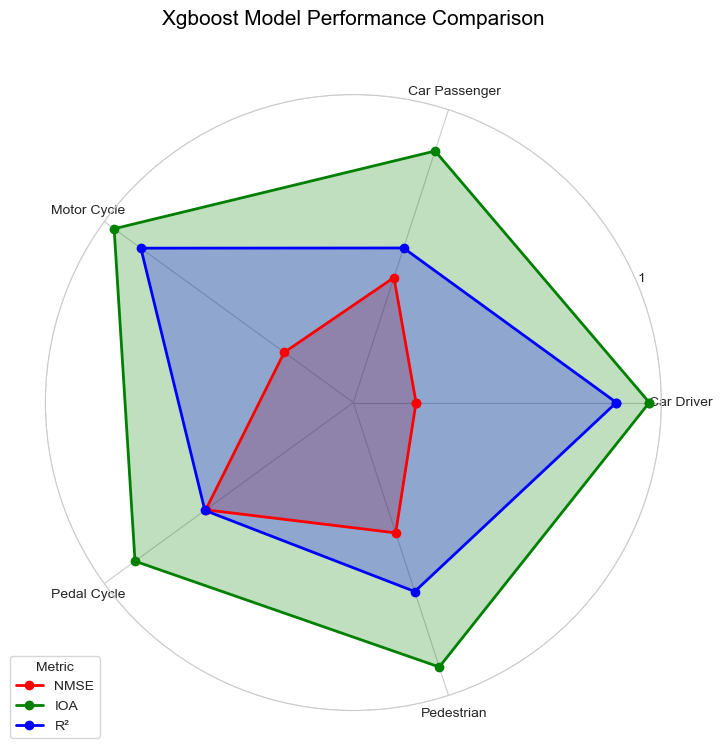

In [35]:
import matplotlib.pyplot as plt
import numpy as np

nmse_values = [0.20355760324923888,
 0.4266696702957406,
 0.2772159613205039,
 0.5924246887295251,
 0.4449436951020675]

ioa_values = [0.9609769907564572,
 0.8586983649265243,
 0.9600293085577463,
 0.876254649619609,
 0.9027714139415548]

r2_values =[0.8539898280223046,
 0.5276319111408605,
 0.8527192270599127,
 0.5957858416577801,
 0.6451582082236339]

labels = ['Car Driver', 'Car Passenger', 'Motor Cycle', 'Pedal Cycle', 'Pedestrian']

data = np.array([nmse_values, ioa_values, r2_values])

num_vars = data.shape[1]

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

colors = ['red', 'green', 'blue']
labels_metric = ['NMSE', 'IOA', 'R²']

for idx, (data_slice, color, label) in enumerate(zip(data, colors, labels_metric)):
    if label == 'MAE':
        alpha_value = 0.5  
    else:
        alpha_value = 0.25 
    data_slice = np.concatenate([data_slice, [data_slice[0]]])  
    ax.plot(angles, data_slice, 'o-', linewidth=2, label=label, color=color)
    ax.fill(angles, data_slice, alpha=alpha_value, color=color)

ax.set_xticks(angles[:-1])  
ax.set_xticklabels(labels)
ax.set_yticks([1, 2, 3, 4, 5])  
ax.set_yticklabels(['1', '2', '3', '4', '5'])

plt.title('Xgboost Model Performance Comparison', size=15, color='black', y=1.1)
plt.legend(title='Metric', loc='upper right', bbox_to_anchor=(0.1, 0.1))
ax.set_ylim(0, 1)

plt.show()


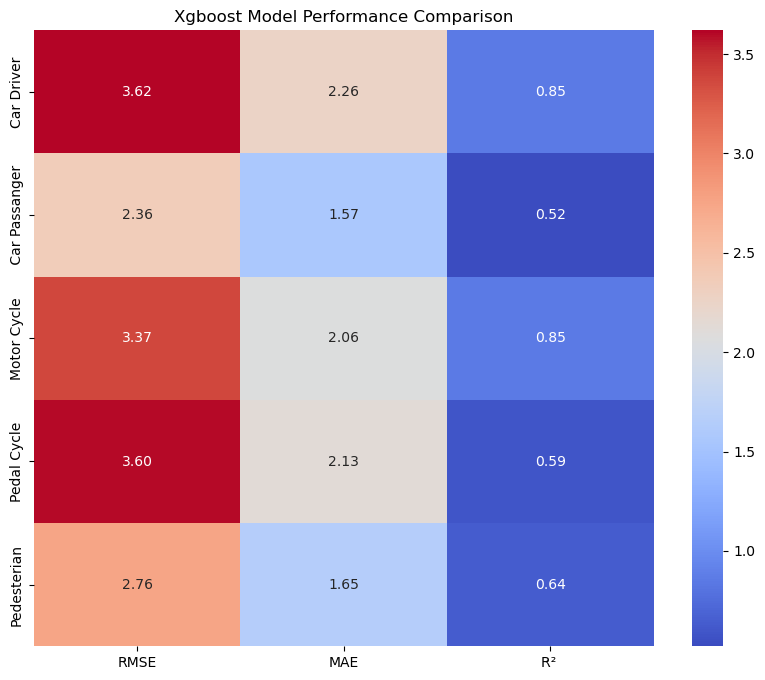

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# فرض کنید که مقادیر MSE، MAE و R² برای هر پنج مدل را دارید
mse_values = [3.62, 2.36, 3.37, 3.6, 2.76]
mae_values = [2.26, 1.57, 2.06, 2.13, 1.65]
r2_values = [0.85, 0.52, 0.85,0.59,  0.64]

# ایجاد داده‌ها برای هیت مپ
metrics = ['Car Driver', ' Car Passanger ', 'Motor Cycle', 'Pedal Cycle', 'Pedesterian']
models = ['RMSE', 'MAE', 'R² ']
data = np.array([mse_values, mae_values, r2_values]).T
#metrics
# ایجاد هیت مپ
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(data, annot=True, fmt='.2f', xticklabels=models, yticklabels=metrics, cmap='coolwarm')
heatmap.set_title('Xgboost Model Performance Comparison')

plt.show()

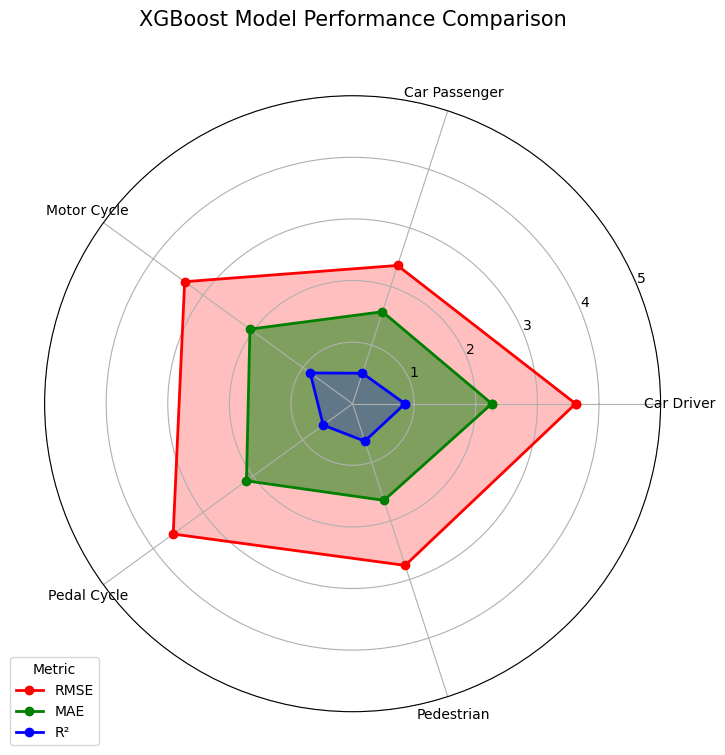

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# مقادیر MSE، MAE و R² برای هر پنج مدل
mse_values = [3.62, 2.36, 3.37, 3.6, 2.76]
mae_values = [2.26, 1.57, 2.06, 2.13, 1.65]
r2_values = [0.85, 0.52, 0.85,0.59,  0.64]

# نام مدل‌ها
labels = ['Car Driver', 'Car Passenger', 'Motor Cycle', 'Pedal Cycle', 'Pedestrian']

# ترکیب داده‌ها در یک آرایه
data = np.array([mse_values, mae_values, r2_values])

# تعداد متغیرها
num_vars = data.shape[1]

# تقسیم دایره به بخش‌های مساوی
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # بستن دایره

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# رنگ‌ها برای هر معیار
colors = ['red', 'green', 'blue']
labels_metric = ['RMSE', 'MAE', 'R²']

for idx, (data_slice, color, label) in enumerate(zip(data, colors, labels_metric)):
    if label == 'MAE':
        alpha_value = 0.5  # تنظیم شفافیت برای MAE
    else:
        alpha_value = 0.25  # تنظیم شفافیت برای سایر معیارها
    data_slice = np.concatenate([data_slice, [data_slice[0]]])  # بستن دایره
    ax.plot(angles, data_slice, 'o-', linewidth=2, label=label, color=color)
    ax.fill(angles, data_slice, alpha=alpha_value, color=color)

ax.set_xticks(angles[:-1])  # تنظیم موقعیت برچسب‌ها
ax.set_xticklabels(labels)
ax.set_yticks([1, 2, 3, 4, 5])  # تنظیم مقیاس محور y
ax.set_yticklabels(['1', '2', '3', '4', '5'])

plt.title('XGBoost Model Performance Comparison', size=15, color='black', y=1.1)
plt.legend(title='Metric', loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()
